# AIML 2024-2025 Project

* Vince Coppens
* Mateusz Waglowski
* Hamza Yazan Jamal

---
## Libraries

Install all necesary libraries

In [ ]:
# %pip install pandas
# %pip install missingno
# %pip install seaborn
# %pip install matplotlib

Import all necesary libraries

In [ ]:
# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Statistical Distributions
from scipy.stats import bernoulli
from scipy.stats import gamma
from scipy.stats import poisson
from scipy.stats import norm  
from scipy.stats import lognorm 
from scipy.stats import beta  
import scipy.stats as stats  

# Date and Time Manipulation
import datetime as dt 

# Data Imputation and Preprocessing
from sklearn.impute import SimpleImputer 
from sklearn.impute import KNNImputer  
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Warnings Control
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# To calculate the total runtime
time1 = dt.datetime.now().time()
print(time1)

---
## Import and prepare dataset

Import the dataset as a dataframe

In [ ]:
title = 'alien_galaxy.csv'
df = pd.read_csv(title)
df.head()

Following variables are part of the dataset:
- **Peace_Treaty_Accords**: Number of formal peace agreements made between alien species.
- **Technological_Advancements**: The level of technological innovations achieved by the planet's inhabitants.
- **Ammonia_Concentration**: The concentration of ammonia in the planet’s atmosphere or environment.
- **Precious_Metal_Trade_Tons**: The total trade volume of precious metals conducted by the planet, measured in tons.
- **Food_Production_Tons**: The amount of food produced on the planet, measured in tons.
- **Trade_Agreements_Signed**: The total number of interplanetary trade agreements signed by the planet's inhabitants.
- **Last_Contact_Days**: The number of days since the last interstellar communication or visit.
- **Discovery_Date**: The date when the planet was first discovered by alien explorers.
- **Mineral_Extraction_Tons**: The quantity of minerals extracted from the planet, measured in tons.
- **Galactic_Visits**: The number of visits made by interstellar travelers to the planet.
- **Sulfur_Concentration**: The level of sulfur present in the planet’s atmosphere or soil.
- **Exploration_Missions**: The number of exploration missions launched to study or survey the planet.
- **Biological_Research_Units**: The amount of biological research conducted on the planet, measured in units.
- **Offspring_Colonies**: The number of colonies established by the dominant species as offspring expansions.
- **Cultural_Exchange_Programs**: The number of cultural exchange initiatives with other planets or species.
- **Military_Engagements**: The number of military conflicts or engagements that have occurred on the planet.
- **Inhabitants_Disputes**: The number of disputes or conflicts among the planet’s inhabitants.
- **Resource_Mining_Operations**: The total number of resource extraction operations active on the planet.
- **Resource_Allocation_Credits**: The amount of credits allocated to managing and distributing resources.
- **Young_Colonies**: Newly established colonies or outposts of the dominant species.
- **HeavyMetals_Concentration**: The concentration of heavy metals in the planet's environment.
- **Terraforming_Initiatives**: The number of projects initiated to alter the planet’s environment to support life.
- **Planet_ID**: A unique identifier assigned to the planet.
- **Liquid_Energy_Consumption_Terawatts**: The planet’s total consumption of liquid energy resources, measured in terawatts.
- **Alien_Population_Count**: The total population of aliens inhabiting the planet.
- **CO2_Concentration**: The concentration of carbon dioxide in the planet’s atmosphere.
- **Dominant_Species_Social_Structure**: The social organization or hierarchy of the planet’s dominant species.
- **Hydrogen_Concentration**: The concentration of hydrogen in the planet’s atmosphere or environment.
- **Colonization_Year**: The year the planet was first colonized by alien species.
- **Species_Expansion_Response**: The dominant species' response or activity related to expanding their influence or territory.
- **Galactic_Trade_Revenue**: The revenue generated from intergalactic trade conducted by the planet.
- **Alien_Civilization_Level**: The level of development and sophistication of the alien civilization inhabiting the planet.
- **Interstellar_Contact_Cost**: The total cost associated with maintaining communication and relations with other planets.
- **Interplanetary_Communications**: The number of communications or signals exchanged between planets.

In [ ]:
df.info()

Summary Statistics:

* The average number of peace treaty accords signed is approximately 0.067, indicating that peace treaties are signed relatively infrequently.
* Technological advancements have an average occurrence of 0.066, since this is a binary variable this indicates that technological advancements do not much occur.
* The average ammonia concentration is around 1.48 units, with values ranging between 1 and 5.
* Precious metal trade averages 44.14 tons, but the values can vary widely, ranging from 0 to a high of 362 tons.
* Food production averages 26.18 tons, with large variations; some instances produce as little as 1 ton, while the maximum is 199 tons.
* Resource extraction is highly variable, with mineral extraction averaging 164.69 tons, ranging from 0 to as high as 1,725 tons.
* Galactic visits occur at an average rate of 5.33 visits, generally ranging from 2 to 7 visits.
* Exploration missions average 2.66 missions, with most entities conducting between 0 and 4 missions.
* Biological research units average 37.8 units, ranging from 0 to 259 units.
* On average, 0.44 offspring colonies are established per entity, ranging from 0 to a maximum of 2.
* Resource mining operations average 5.76 operations, with a range of 0 to 13 operations per entity.
* The average hydrogen concentration in the system is 59.83 units, varying from 1.03 to 119.99 units.
* Heavy metals concentration averages 2.99 units, typically between 2 and 6 units.

In [ ]:
stats_summary = df.describe()
stats_summary.T

Check whether there are duplicate rows

In [ ]:
duplicate_values = False
for i in df.duplicated():
    if i == True:
        print(i)
        duplicate_values = True
if duplicate_values == False:
    print('No duplicate rows were found.')

Using Missingno to plot the NaN values.

In [ ]:
plt.figure(figsize=(6, 3))
msno.matrix(df)
plt.title("Missing Data Matrix")
plt.show()

Number of data rows

In [ ]:
print(f'There are {df.shape[0]} rows.')

Number of NaN's per variable and relative percentage, the next cell shows a graphical representation.

In [ ]:
nan_counts = df.isna().sum()
nan_counts_df = nan_counts.to_frame(name='NaN_Count')
nan_counts_df = nan_counts_df.reset_index()
nan_counts_df.columns = ['Variable', 'NaN_Count']
nan_counts_df['Relative'] = nan_counts_df['NaN_Count'] / df.shape[0]
nan_counts_df = nan_counts_df.sort_values(by='Relative', ascending=False)
nan_counts_df = nan_counts_df.reset_index(drop=True)
print(nan_counts_df.head(10))
# Set the figure size
plt.figure(figsize=(15, 6))

# Create a bar plot
sns.barplot(data=nan_counts_df, x='Variable', y='NaN_Count', order=nan_counts_df['Variable'])

# Set labels and title
plt.xlabel("Variable")
plt.ylabel("NaN Count")
plt.title("NaN Count per Column")

# Rotate x-axis labels if needed
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Are there rows who do not miss any value?

In [ ]:
complete_rows = df.dropna().shape[0]
total_rows = df.shape[0]

print(f'The percentage of rows without empty values is: {round(complete_rows/total_rows, 2)}%')

*Only 0.03% of the rows is complete, so we will have to predict some NaN's to make sure we have usefull data. We will go over the variables, check their distributions, correlations and drop the columns which we don't need.*

Drop some columns, we will do this in a new dataframe, as such we still have the data when need it afterwards.
Columns we will drop:
* Planet_ID: not relevant for clustering
* Galactic_Trade_Revenue: This variable has constant value '11', so it is not relevant for the clustering.
* Interstellar_Contact_Cost: This variable has constant value '3', so it is not relevant for the clustering.

In [ ]:
#Make a copy of the dataframe, as such we can always retrieve deleted data easily
#df_prep = df.copy()
df_prep = df.drop(['Planet_ID', 'Galactic_Trade_Revenue', 'Interstellar_Contact_Cost'], axis=1)

In [ ]:
# Convert discovery_date to timestamp format and afterwards we standardize it, this way we can plot it easily.
df_prep['Discovery_Date'] = pd.to_datetime(df_prep['Discovery_Date'], errors='coerce')
df_prep['Discovery_Date'] = df_prep['Discovery_Date'].apply(
    lambda x: int(x.timestamp()) if pd.notnull(x) else None
)
df_prep['Discovery_Date'] = (df_prep['Discovery_Date']-np.mean(df_prep['Discovery_Date'])) / np.std(df_prep['Discovery_Date'])

df_prep

In [ ]:
numeric_data = df_prep.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of All Variables")
plt.show()

In [ ]:
#Function to calculate and save the biggest correlations. Since we don't pay attention to correlations when filling up the missing values we can see here how big the difference is.
def high_correlations(df, threshold=0.5):
    correlation_matrix = df.corr()

    result = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i + 1, len(correlation_matrix.columns)):
            corr_value = correlation_matrix.iloc[i, j]
            if abs(corr_value) > threshold:
                result.append({
                    'Variable 1': correlation_matrix.columns[i],
                    'Variable 2': correlation_matrix.columns[j],
                    'Correlation': abs(corr_value)
                })

    correlation_df = pd.DataFrame(result)
    correlation_df = correlation_df.sort_values(by='Correlation', ascending=False)
    correlation_df = correlation_df.reset_index(drop=True)

    return correlation_df

In [ ]:
# call the correlation caluculation function
correlation_df = high_correlations(df_prep)
correlation_df.head()

Here are the interpretations for the top 5 correlations:
* Mineral Extraction Tons and Exploration Missions (0.723): A strong positive correlation indicates that as the volume of mineral extraction increases, the number of exploration missions also tends to increase. This may suggest a coordinated effort where higher extraction activities drive further exploration to discover new resources.
* Resource Mining Operations and Liquid Energy Consumption Terawatts (0.639): There is a moderate to strong positive correlation between mining operations and energy consumption. This relationship likely reflects the high energy demand required for mining activities, suggesting that increases in mining operations are closely tied to higher energy use.
* Exploration Missions and Liquid Energy Consumption Terawatts (0.615): A moderate positive correlation suggests that an increase in exploration missions is associated with an increase in energy consumption. This could imply that energy resources are heavily utilized in exploration efforts, possibly due to the need for power-intensive equipment and technology.
* Food Production Tons and Biological Research Units (0.600): There is a moderate positive correlation, indicating that higher levels of food production are associated with an increase in biological research activities. This relationship might be due to research focused on optimizing food production processes, improving crop yields, or understanding biological factors that affect agriculture.
* Biological Research Units and Resource Allocation Credits (0.575): A moderate positive correlation suggests that as biological research increases, so does the allocation of credits (likely funding or resources) towards it. This relationship could imply that biological research attracts more resources, possibly due to its perceived importance or impact on other sectors, such as food production or health-related research.

In [ ]:
# Function to easily plot the distributions of the demanded variables

def perform_graphical_analysis(plots_per_row, columns, df):
    for i in range(0, len(columns), plots_per_row):
        current_columns = columns[i:i+plots_per_row]
        num_current_columns = len(current_columns)
        
        fig, axes = plt.subplots(1, num_current_columns, figsize=(6 * num_current_columns, 6))
        
        # Ensure axes is always a list for easy iteration, even when there's only one plot
        if num_current_columns == 1:
            axes = [axes]

        for j, column in enumerate(current_columns):
            if df[column].nunique() <= 2:
                sns.countplot(x=df[column], ax=axes[j])
                axes[j].set_title(f'Count plot of {column} (binary)')
                axes[j].set_xlabel(column)
                axes[j].set_ylabel('Count')
            else:
                sns.histplot(df[column], kde=True, ax=axes[j])
                axes[j].set_title(f'Distribution of {column}')
                axes[j].set_xlabel(column)
                axes[j].set_ylabel('Frequency')

        plt.tight_layout()
        plt.show()

In [ ]:
# Plot all variables to get an idea of the different distributions
plots_per_row = 5
columns = df_prep.columns
perform_graphical_analysis(plots_per_row, columns, df_prep)

---
## Start filling up the missing values using the distributions

In [ ]:
# Replace the categorical values by numerical values. Alien_Civilization_Level is ordinal, Dominant_Species_Social_Structure not. So we use categorical columns, one-hot encoding resp.

df_in_progress = df_prep.copy()

#One hot encoding
# Step 1: Impute missing values in the categorical column
imputer = SimpleImputer(strategy='constant', fill_value='missing')
df_in_progress['Dominant_Species_Social_Structure'] = imputer.fit_transform(df_in_progress[['Dominant_Species_Social_Structure']])

# Step 2: Apply one-hot encoding
df_in_progress = pd.get_dummies(df_in_progress, columns=['Dominant_Species_Social_Structure'])
df_in_progress = df_in_progress.drop(['Dominant_Species_Social_Structure_missing'], axis=1)
# Now df_prep has no missing values in the 'Dominant_Species_Social_Structure' column and is one-hot encoded.


#Categorical to numeral values
df_in_progress['Alien_Civilization_Level'] = df_in_progress['Alien_Civilization_Level'].astype('category').cat.codes
df_in_progress['Alien_Civilization_Level'] = df_in_progress['Alien_Civilization_Level'].astype(int)
#Nan's are automatically replaced by -1, we put the NaN's back
df_in_progress['Alien_Civilization_Level'] = df_in_progress['Alien_Civilization_Level'].replace(-1, np.nan)

df_in_progress

In [ ]:
# Functions of the distributions to complete the missing values

# Bernoulli distribution
def impute_with_bernoulli(df, column_name):
    data_column = df[column_name].copy()
    p_success = data_column.mean()
    
    nan_indices = data_column.isna()
    samples = bernoulli(p_success).rvs(size=nan_indices.sum())
    
    data_column.loc[nan_indices] = samples
    
    df[column_name] = data_column

    return df

# Multinomial distribution
def impute_with_multinominal(df,column_name):
    column_data = df[column_name]
    non_nan_data = column_data.dropna()
    
    value_counts = non_nan_data.value_counts(normalize=True).sort_index()
    possible_values = np.arange(int(non_nan_data.min()), int(non_nan_data.max()) + 1)
    probs = [value_counts.get(value, 0) for value in possible_values]
    
    nan_indices = column_data[column_data.isna()].index
    sampled_values = np.random.choice(possible_values, size=len(nan_indices), p=probs)
    
    df.loc[nan_indices, column_name] = sampled_values

    return df

# Gamma distribution
def impute_with_gamma(df, column_name):
    observed_data = df[column_name].dropna()
    shape, loc, scale = gamma.fit(observed_data)

    num_missing = df[column_name].isna().sum()
    imputed_values = gamma.rvs(shape, loc=loc, scale=scale, size=num_missing)
    
    imputed_values_rounded = [int(val) for val in imputed_values]

    na_indices = df[df[column_name].isna()].index
    df.loc[na_indices, column_name] = imputed_values_rounded

    return df

# Uniform distribution
def impute_with_uniform(df, column_name):
    min_val = min(df[column_name])
    max_val = max(df[column_name])
    num_missing = df[column_name].isna().sum()

    imputed_values = np.random.uniform(min_val, max_val, size=num_missing).astype(int)

    na_indices = df[df[column_name].isna()].index
    df.loc[na_indices, column_name] = imputed_values

    return df

# Normal distribution
def impute_with_normal(df, column_name):
    observed_data = df[column_name].dropna()
    loc, scale = norm.fit(observed_data)

    num_missing = df[column_name].isna().sum()
    imputed_values = norm.rvs(loc=loc, scale=scale, size=num_missing)
    
    imputed_values_rounded = [int(val) for val in imputed_values]

    na_indices = df[df[column_name].isna()].index
    df.loc[na_indices, column_name] = imputed_values_rounded

    return df

# Lognormal distribution
def impute_with_lognormal(df, column_name):
    # Get observed (non-missing) data
    observed_data = df[column_name].dropna()
    
    # Fit a lognormal distribution to the observed data
    shape, loc, scale = lognorm.fit(observed_data, floc=0)  # Fix loc=0 for typical lognormal fits
    
    # Generate imputed values for missing data
    num_missing = df[column_name].isna().sum()
    imputed_values = lognorm.rvs(shape, loc, scale, size=num_missing)
    
    # Round imputed values to integers if needed
    imputed_values_rounded = [int(val) for val in imputed_values]

    # Assign imputed values back to the DataFrame
    na_indices = df[df[column_name].isna()].index
    df.loc[na_indices, column_name] = imputed_values_rounded

    return df

# Beta distribution
def impute_with_beta(df, column_name):
    observed_data = df[column_name].dropna()
    min_val = observed_data.min()
    max_val = observed_data.max()
    scaled_data = (observed_data - min_val) / (max_val - min_val)
    a, b, loc, scale = beta.fit(scaled_data, floc=0, fscale=1)
    num_missing = df[column_name].isna().sum()
    imputed_scaled_values = beta.rvs(a, b, loc=0, scale=1, size=num_missing)
    imputed_values = imputed_scaled_values * (max_val - min_val) + min_val
    na_indices = df[df[column_name].isna()].index
    df.loc[na_indices, column_name] = imputed_values

    return df

We try to figure out which distributions match the variables. Therefore we perform a test developped by chat GPT. How to interprete the results?
1.	KS Statistic: This value represents the maximum absolute difference between the cumulative distribution function (CDF) of the data and the CDF of the theoretical distribution. A smaller KS statistic suggests a closer match between the data and the theoretical distribution.
2.	P-value: This value indicates the significance of the difference between the data and the theoretical distribution:
* A high p-value (typically above 0.05) suggests that we cannot reject the null hypothesis, meaning the data could plausibly follow the tested distribution.
* A low p-value (below 0.05) suggests a significant difference, meaning the data likely does not follow the tested distribution.

In [ ]:
def retrieve_distribution(variable):
# Extract the data for the variable to analyze
    variable_distribution = df_in_progress[variable].dropna()

    # List of distributions to test
    dist_names = ['norm', 'expon', 'gamma', 'lognorm', 'uniform', 'poisson', 'geom', 'binom']
    fit_results = {}

    for dist_name in dist_names:
        try:
            # Get the distribution
            dist = getattr(stats, dist_name)
            
            # Fit the distribution to the data
            if dist_name == 'binom':
                # For binomial, n is approximated as max value, p is fitted
                n = int(variable_distribution.max())
                p = variable_distribution.mean() / n
                params = (n, p)
                ks_stat, ks_p_value = stats.kstest(variable_distribution, dist_name, args=params)
            elif dist_name == 'poisson':
                # For Poisson, we use the mean as the lambda parameter
                lambda_param = variable_distribution.mean()
                params = (lambda_param,)
                ks_stat, ks_p_value = stats.kstest(variable_distribution, dist_name, args=params)
            elif dist_name == 'geom':
                # For Geometric, the probability parameter p is approximated as 1 / mean
                p = 1 / variable_distribution.mean()
                params = (p,)
                ks_stat, ks_p_value = stats.kstest(variable_distribution, dist_name, args=params)
            else:
                # Fit continuous distributions normally
                params = dist.fit(variable_distribution)
                ks_stat, ks_p_value = stats.kstest(variable_distribution, dist_name, args=params)
            
            # Store the results
            fit_results[dist_name] = {'params': params, 'ks_stat': ks_stat, 'p_value': ks_p_value}
            
        except Exception as e:
            # Handle distributions that may fail to fit
            fit_results[dist_name] = {'params': None, 'ks_stat': None, 'p_value': None, 'error': str(e)}

    # Convert results to a DataFrame and sort by p-value (higher indicates a better fit)
    fit_results_df = pd.DataFrame(fit_results).T
    fit_results_df.sort_values('p_value', ascending=False, inplace=True)

    # Display the results
    return fit_results_df

In [ ]:
# Divide the variables and perform the retrieve_distribution function on the ones of which we can not immediately recognise the distribution

numeric_data = df_in_progress.select_dtypes(include=['float64', 'int64'])

all_columns = numeric_data.columns
bernoulli_columns = ['Peace_Treaty_Accords', 'Technological_Advancements', 'Cultural_Exchange_Programs', 
                     'Military_Engagements', 'Inhabitants_Disputes', 'Terraforming_Initiatives', 'Species_Expansion_Response'
                     ]
multinomial_columns = ['Ammonia_Concentration', 'Trade_Agreements_Signed', 'Galactic_Visits', 
                       'Offspring_Colonies', 'Resource_Mining_Operations', 'Young_Colonies', 'Sulfur_Concentration', 'Exploration_Missions', 
                       'HeavyMetals_Concentration', 'CO2_Concentration', 'Interplanetary_Communications', 'Alien_Civilization_Level'
                       ]


all_columns = [col for col in all_columns if col not in bernoulli_columns]
all_columns = [col for col in all_columns if col not in multinomial_columns]

filtered_df = numeric_data[all_columns]

results = list()

for column in filtered_df.columns:
    results_df_for_column = retrieve_distribution(column)
    top_result = results_df_for_column.iloc[0].copy()
    top_result['variable'] = column
    top_result['best_distribution'] = results_df_for_column.index[0]
    results.append(top_result)

results_df = pd.DataFrame(results).reset_index(drop=True)
results_df

In [ ]:
# For some reason Python thinks Discovery_Date is lognorm but the values are normally distributed (we standardized it) and so it also has negative values.
results_df.loc[results_df["variable"] == 'Discovery_Date', "best_distribution"] = 'norm'

In [ ]:
# If we want to check the distribution for 1 specific variable, we can use this cell

# results_df = retrieve_distribution('Precious_Metal_Trade_Tons')
# results_df

In [ ]:
# Fill the missing values up using the distributions
distribution_functions = {
    "bernoulli": (bernoulli_columns, impute_with_bernoulli),
    "multinomial": (multinomial_columns, impute_with_multinominal),
    "gamma": (results_df[results_df["best_distribution"] == "gamma"]["variable"].tolist(), impute_with_gamma),
    "uniform": (results_df[results_df["best_distribution"] == "uniform"]["variable"].tolist(), impute_with_uniform),
    "norm": (results_df[results_df["best_distribution"] == "norm"]["variable"].tolist(), impute_with_normal),
    "beta": (results_df[results_df["best_distribution"] == "beta"]["variable"].tolist(), impute_with_beta),
    "lognorm": (results_df[results_df["best_distribution"] == "lognorm"]["variable"].tolist(), impute_with_gamma)
}

# Loop through each distribution and impute columns
for distribution, (columns_to_impute, impute_function) in distribution_functions.items():
    try:
        for col in columns_to_impute:
            df_in_progress = impute_function(df_in_progress, col)
    except Exception as e:
        print(e)

# Check for remaining missing values
df_in_progress.isna().sum()

In [ ]:
# Plot all variables to get an idea of the different distributions
plots_per_row = 5
columns = df_in_progress.columns
perform_graphical_analysis(plots_per_row, columns, df_in_progress)

In [ ]:
#Calculate the correlations after completing the values
correlation_df1 = high_correlations(df_in_progress)
combined_df = pd.concat([correlation_df, correlation_df1], axis=1)
combined_df.head(10)

We see that the correlations dropped (significantly), we could have avoided this by using KNN to complete our variables.

---
## Filling up the missing values using KNN

Markdown Description

This cell creates a copy of the preprocessed DataFrame df_prep and stores it in a new DataFrame named df_in_progress_2. This allows us to perform further data transformations and analyses on df_in_progress_2 without altering the original df_prep DataFrame, preserving it for reference or re-use if needed. Displaying df_in_progress_2 shows the first few rows of this copied dataset to confirm successful duplication.

In [111]:
df_in_progress_2 = df_prep.copy()
df_in_progress_2

,Peace_Treaty_Accords,Technological_Advancements,Ammonia_Concentration,Precious_Metal_Trade_Tons,Food_Production_Tons,Trade_Agreements_Signed,Last_Contact_Days,Discovery_Date,Mineral_Extraction_Tons,Galactic_Visits,...,Liquid_Energy_Consumption_Terawatts,Alien_Population_Count,CO2_Concentration,Dominant_Species_Social_Structure,Hydrogen_Concentration,Colonization_Year,Species_Expansion_Response,Alien_Civilization_Level,Interplanetary_Communications,Cluster
0,0.0,0.0,1.0,40.0,107.0,1.0,13.0,1.018263,391.0,3.0,...,647.0,78285.0,10.0,Married,98.55,3118.0,NaN,Master,6.0,1.0
1,0.0,0.0,2.0,108.0,49.0,1.0,NaN,-0.831594,NaN,2.0,...,581.0,62772.0,10.0,Single,66.36,3099.0,0.0,Master,5.0,1.0
2,NaN,0.0,1.0,161.0,53.0,NaN,61.0,-0.371167,363.0,5.0,...,726.0,69016.0,5.0,Married,25.23,3100.0,0.0,Graduation,8.0,1.0
3,0.0,0.0,1.0,107.0,NaN,3.0,NaN,0.847131,53.0,7.0,...,314.0,43795.0,NaN,Together,44.59,3098.0,1.0,Master,7.0,2.0
4,0.0,0.0,0.0,29.0,59.0,7.0,24.0,-0.053350,177.0,3.0,...,290.0,57957.0,8.0,Together,90.67,3089.0,0.0,Graduation,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.0,0.0,2.0,7.0,0.0,1.0,NaN,NaN,14.0,5.0,...,8.0,35924.0,2.0,Together,71.60,3099.0,0.0,Master,1.0,NaN
2236,0.0,0.0,2.0,8.0,0.0,2.0,39.0,0.647477,NaN,5.0,...,56.0,47472.0,9.0,Together,NaN,3096.0,0.0,PhD,2.0,NaN
2237,0.0,0.0,1.0,4.0,4.0,2.0,0.0,0.403003,61.0,4.0,...,140.0,62499.0,5.0,Together,62.52,3109.0,0.0,NaN,3.0,NaN
2238,0.0,0.0,1.0,149.0,47.0,1.0,92.0,-0.660461,197.0,4.0,...,202.0,49767.0,2.0,Single,47.32,3121.0,0.0,Graduation,5.0,NaN


In [ ]:
#df_in_progress_2.to_csv('filename.csv', index=False)

Markdown Description

In this cell, we identify and visualize highly correlated variables within the dataset to explore relationships and potential multicollinearity:
1.	Calculate Correlation Matrix: We compute the absolute correlation matrix for all variables in df_in_progress_2. This helps us understand the strength of the relationships between variables.
2.	Exclude Self-Correlation: The diagonal values of the matrix, which represent self-correlation (always equal to 1), are set to NaN. This prevents them from influencing the selection of highly correlated variables.
3.	Select Highly Correlated Variables: We identify variables that have a correlation greater than 0.5 with at least one other variable, excluding self-correlation. These high-correlation variables are stored in high_corr_vars.
4.	Visualize Relationships with Pairplot: Instead of using only the filtered high-correlation variables, we create a pairplot for all variables in df_in_progress_2 with color-coded points based on the categorical variable 'Dominant_Species_Social_Structure'. This visualization shows scatterplots of variable relationships and histograms along the diagonal to help understand patterns and clusters.

This cell provides an overview of relationships between variables, highlighting significant correlations that may need to be addressed in further analysis.

In [ ]:
if True:
    # Calculate the correlation matrix
    correlation_matrix = df_in_progress_2.corr().abs()

    # Set the diagonal values to NaN to avoid selecting variables based on self-correlation
    np.fill_diagonal(correlation_matrix.values, np.nan)

    # Select variables with any correlation > 0.5 with another variable (excluding self-correlation)
    high_corr_vars = correlation_matrix.columns[(correlation_matrix > 0.5).any(axis=1)]

    # Filter the dataset to include only the selected variables
    filtered_data = df_in_progress_2[high_corr_vars]

    # Create the pairplot with the filtered variables
    sns.pairplot(filtered_data, corner=True)

    # Pair plot of all the variables
    #sns.pairplot(df_in_progress_2, corner=True, hue='Dominant_Species_Social_Structure')
    plt.show()


Markdown Description

In this cell, we handle categorical encoding and missing values for specific columns in df_in_progress_2:
1.	One-Hot Encoding for Categorical Variables:
    * Step 1: We impute any missing values in the 'Dominant_Species_Social_Structure' column using a constant placeholder ('missing'). This ensures there are no missing values when we perform one-hot encoding.
	* Step 2: We apply one-hot encoding to 'Dominant_Species_Social_Structure', creating separate binary columns for each category. After encoding, we remove the placeholder column ('Dominant_Species_Social_Structure_missing') to avoid redundancy. This transforms the categorical column into a set of dummy variables suitable for analysis.
2.	Convert Ordinal Category to Numeric Codes:
	* For the 'Alien_Civilization_Level' column, we convert categorical levels to integer codes. Using .cat.codes assigns each category a unique integer, making it numeric while preserving its ordinal nature.
	* By default, missing values are encoded as -1 during this conversion, so we replace these -1 values back to NaN to accurately represent missing data.

This cell completes the encoding and imputation process for the selected categorical columns, preparing df_in_progress_2 for further analysis or modeling with no missing values in 'Dominant_Species_Social_Structure' and numerically represented levels in 'Alien_Civilization_Level'.

In [113]:
#One hot encoding

# # Step 1: Impute missing values in the categorical column
categorical_imputer = SimpleImputer(strategy='most_frequent', fill_value='missing')
df_in_progress_2[['Dominant_Species_Social_Structure']] = categorical_imputer.fit_transform(df_in_progress_2[['Dominant_Species_Social_Structure']])

# Step 2: Apply one-hot encoding
df_in_progress_2 = pd.get_dummies(df_in_progress_2, columns=['Dominant_Species_Social_Structure'])
#df_in_progress_2 = df_in_progress_2.drop(['Dominant_Species_Social_Structure_missing'], axis=1)
# Now df_prep has no missing values in the 'Dominant_Species_Social_Structure' column and is one-hot encoded.


#Categorical to numeral values
df_in_progress_2['Alien_Civilization_Level'] = df_in_progress_2['Alien_Civilization_Level'].astype('category').cat.codes
#Nan's are automatically replaced by -1, we put the NaN's back
df_in_progress_2['Alien_Civilization_Level'] = df_in_progress_2['Alien_Civilization_Level'].replace(-1, np.nan)

df_in_progress_2.sample(20)

,Peace_Treaty_Accords,Technological_Advancements,Ammonia_Concentration,Precious_Metal_Trade_Tons,Food_Production_Tons,Trade_Agreements_Signed,Last_Contact_Days,Discovery_Date,Mineral_Extraction_Tons,Galactic_Visits,...,Interplanetary_Communications,Cluster,Dominant_Species_Social_Structure_Absurd,Dominant_Species_Social_Structure_Alone,Dominant_Species_Social_Structure_Divorced,Dominant_Species_Social_Structure_Married,Dominant_Species_Social_Structure_Single,Dominant_Species_Social_Structure_Together,Dominant_Species_Social_Structure_Widow,Dominant_Species_Social_Structure_YOLO
201,0.0,0.0,2.0,56.0,142.0,4.0,8.0,-0.338570,217.0,5.0,...,7.0,1.0,0,0,0,1,0,0,0,0
1473,0.0,0.0,0.0,20.0,9.0,4.0,NaN,0.578209,45.0,6.0,...,2.0,1.0,0,0,0,0,1,0,0,0
1065,0.0,0.0,1.0,131.0,15.0,1.0,64.0,-0.900861,100.0,6.0,...,9.0,3.0,0,0,1,0,0,0,0,0
1075,NaN,0.0,2.0,6.0,7.0,3.0,15.0,1.042711,23.0,5.0,...,3.0,1.0,0,0,0,1,0,0,0,0
524,0.0,0.0,1.0,NaN,15.0,1.0,45.0,-0.126692,263.0,1.0,...,NaN,1.0,0,0,0,0,1,0,0,0
2085,0.0,0.0,2.0,1.0,1.0,1.0,NaN,1.515361,5.0,8.0,...,1.0,NaN,0,0,0,1,0,0,0,0
1323,0.0,0.0,2.0,6.0,3.0,2.0,67.0,0.671924,19.0,8.0,...,2.0,3.0,0,0,0,1,0,0,0,0
611,0.0,0.0,1.0,76.0,23.0,1.0,18.0,1.649822,424.0,1.0,...,3.0,3.0,0,0,1,0,0,0,0,0
413,0.0,0.0,0.0,17.0,19.0,NaN,NaN,0.101484,9.0,NaN,...,NaN,3.0,0,0,0,1,0,0,0,0
1992,NaN,0.0,0.0,88.0,6.0,3.0,37.0,0.541538,97.0,6.0,...,6.0,NaN,0,0,0,0,0,1,0,0


Markdown Description

In this cell, we address scaling, imputation of missing values, and rescaling back to original values:
1.	Data Scaling:
	* We use StandardScaler to standardize df_in_progress_2, centering each feature around zero and scaling to unit variance. This step is essential for methods like K-Nearest Neighbors (KNN), which are distance-based and require consistent scaling across features. The scaled data is stored in df_in_progress_2_scaled.
2.	KNN Imputation:
	* We apply KNNImputer to fill in missing values based on the nearest neighbors in the scaled data. Here, we use 5 neighbors (n_neighbors=5), meaning each missing value is imputed based on the average of the 5 nearest data points. The imputed and scaled data is saved in housing_data_imputed_scaled.
3.	Rescaling to Original Values:
	* After imputation, we use scaler.inverse_transform to revert the scaled data back to its original range. This step ensures the imputed data remains consistent with the initial feature scales. The final imputed and rescaled DataFrame is saved back to df_in_progress_2.
4.	Checking for Remaining Missing Values:
	* Finally, we check for any remaining missing values in df_in_progress_2 to confirm that imputation has been successfully completed.

This cell prepares the dataset by handling missing values in a way that maintains the integrity of feature scales and distributions, making it ready for downstream analysis or modeling.

In [114]:
# 1. Scale the data
scaler = StandardScaler()
df_in_progress_2_scaled = pd.DataFrame(scaler.fit_transform(df_in_progress_2), columns=df_in_progress_2.columns)

# 2. Apply KNN Imputer on scaled data
imputer = KNNImputer(n_neighbors=5)
alien_data_imputed_scaled = pd.DataFrame(imputer.fit_transform(df_in_progress_2_scaled), columns=df_in_progress_2.columns)

# 3. Transform back to original values
df_in_progress_2 = pd.DataFrame(scaler.inverse_transform(alien_data_imputed_scaled), columns=df_in_progress_2.columns)

# 4. Ensure integer columns remain integers after imputation
# Round specifically for integer-like columns such as 'Alien_Civilization_Level'
#df_in_progress_2['Alien_Civilization_Level'] = df_in_progress_2['Alien_Civilization_Level'].round()
numerical_columns = [
    'Peace_Treaty_Accords', 'Technological_Advancements', 'Ammonia_Concentration',  'Precious_Metal_Trade_Tons', 'Food_Production_Tons',
    'Trade_Agreements_Signed', 'Last_Contact_Days', 'Mineral_Extraction_Tons',  'Galactic_Visits', 'Sulfur_Concentration',
    'Exploration_Missions', 'Biological_Research_Units', 'Offspring_Colonies', 'Cultural_Exchange_Programs', 'Military_Engagements',
    'Inhabitants_Disputes', 'Resource_Mining_Operations', 'Resource_Allocation_Credits', 'Young_Colonies', 'HeavyMetals_Concentration',
    'Terraforming_Initiatives', 'Liquid_Energy_Consumption_Terawatts', 'Alien_Population_Count', 'CO2_Concentration', 
    'Colonization_Year', 'Species_Expansion_Response', 'Interplanetary_Communications', 'Alien_Civilization_Level'
]

for column in numerical_columns:
    # Convert columns that are conceptually integers to int
    df_in_progress_2[column] = df_in_progress_2[column].round()  

# Check if there are any remaining missing values
df_in_progress_2.isna().sum()
df_in_progress_2

# Source code: 'KNN imputer and how to choose regression techniques' lab

,Peace_Treaty_Accords,Technological_Advancements,Ammonia_Concentration,Precious_Metal_Trade_Tons,Food_Production_Tons,Trade_Agreements_Signed,Last_Contact_Days,Discovery_Date,Mineral_Extraction_Tons,Galactic_Visits,...,Interplanetary_Communications,Cluster,Dominant_Species_Social_Structure_Absurd,Dominant_Species_Social_Structure_Alone,Dominant_Species_Social_Structure_Divorced,Dominant_Species_Social_Structure_Married,Dominant_Species_Social_Structure_Single,Dominant_Species_Social_Structure_Together,Dominant_Species_Social_Structure_Widow,Dominant_Species_Social_Structure_YOLO
0,0.0,0.0,1.0,40.0,107.0,1.0,13.0,1.018263,391.0,3.0,...,6.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,2.0,108.0,49.0,1.0,52.0,-0.831594,404.0,2.0,...,5.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,161.0,53.0,2.0,61.0,-0.371167,363.0,5.0,...,8.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,107.0,7.0,3.0,36.0,0.847131,53.0,7.0,...,7.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,29.0,59.0,7.0,24.0,-0.053350,177.0,3.0,...,4.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.0,0.0,2.0,7.0,0.0,1.0,60.0,0.220462,14.0,5.0,...,1.0,1.2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2236,0.0,0.0,2.0,8.0,0.0,2.0,39.0,0.647477,16.0,5.0,...,2.0,1.6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2237,0.0,0.0,1.0,4.0,4.0,2.0,0.0,0.403003,61.0,4.0,...,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2238,0.0,0.0,1.0,149.0,47.0,1.0,92.0,-0.660461,197.0,4.0,...,5.0,2.2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [115]:
# Calculate Q1, Q3, and IQR
Q1 = df_in_progress_2.quantile(0.25)
Q3 = df_in_progress_2.quantile(0.75)
IQR = Q3 - Q1

# Replace zero IQR values with a small constant or exclude such columns from outlier detection
IQR[IQR == 0] = np.nan  # Set IQR to NaN for columns with IQR = 0

# Define range multiplier
range_multiplier = 3

# Filter out outliers while ignoring columns with NaN IQR
df_no_outliers = df_in_progress_2[
    ~(
        ((df_in_progress_2 < (Q1 - range_multiplier * IQR)) | 
         (df_in_progress_2 > (Q3 + range_multiplier * IQR)))
        .any(axis=1)
    )
]

# Calculate the number of outliers removed
outliers_removed = len(df_in_progress_2) - len(df_no_outliers)
total_rows = len(df_in_progress_2)
outliers_percentage = (outliers_removed / total_rows) * 100

print(f"Removed {outliers_removed} entries, {outliers_percentage:.2f}% of the dataset")
df_in_progress_2 = df_no_outliers.copy()
df_in_progress_2

Removed 259 entries, 11.56% of the dataset


,Peace_Treaty_Accords,Technological_Advancements,Ammonia_Concentration,Precious_Metal_Trade_Tons,Food_Production_Tons,Trade_Agreements_Signed,Last_Contact_Days,Discovery_Date,Mineral_Extraction_Tons,Galactic_Visits,...,Interplanetary_Communications,Cluster,Dominant_Species_Social_Structure_Absurd,Dominant_Species_Social_Structure_Alone,Dominant_Species_Social_Structure_Divorced,Dominant_Species_Social_Structure_Married,Dominant_Species_Social_Structure_Single,Dominant_Species_Social_Structure_Together,Dominant_Species_Social_Structure_Widow,Dominant_Species_Social_Structure_YOLO
0,0.0,0.0,1.0,40.0,107.0,1.0,13.0,1.018263,391.0,3.0,...,6.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,2.0,108.0,49.0,1.0,52.0,-0.831594,404.0,2.0,...,5.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,161.0,53.0,2.0,61.0,-0.371167,363.0,5.0,...,8.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,107.0,7.0,3.0,36.0,0.847131,53.0,7.0,...,7.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,29.0,59.0,7.0,24.0,-0.053350,177.0,3.0,...,4.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.0,0.0,2.0,7.0,0.0,1.0,60.0,0.220462,14.0,5.0,...,1.0,1.2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2236,0.0,0.0,2.0,8.0,0.0,2.0,39.0,0.647477,16.0,5.0,...,2.0,1.6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2237,0.0,0.0,1.0,4.0,4.0,2.0,0.0,0.403003,61.0,4.0,...,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2238,0.0,0.0,1.0,149.0,47.0,1.0,92.0,-0.660461,197.0,4.0,...,5.0,2.2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


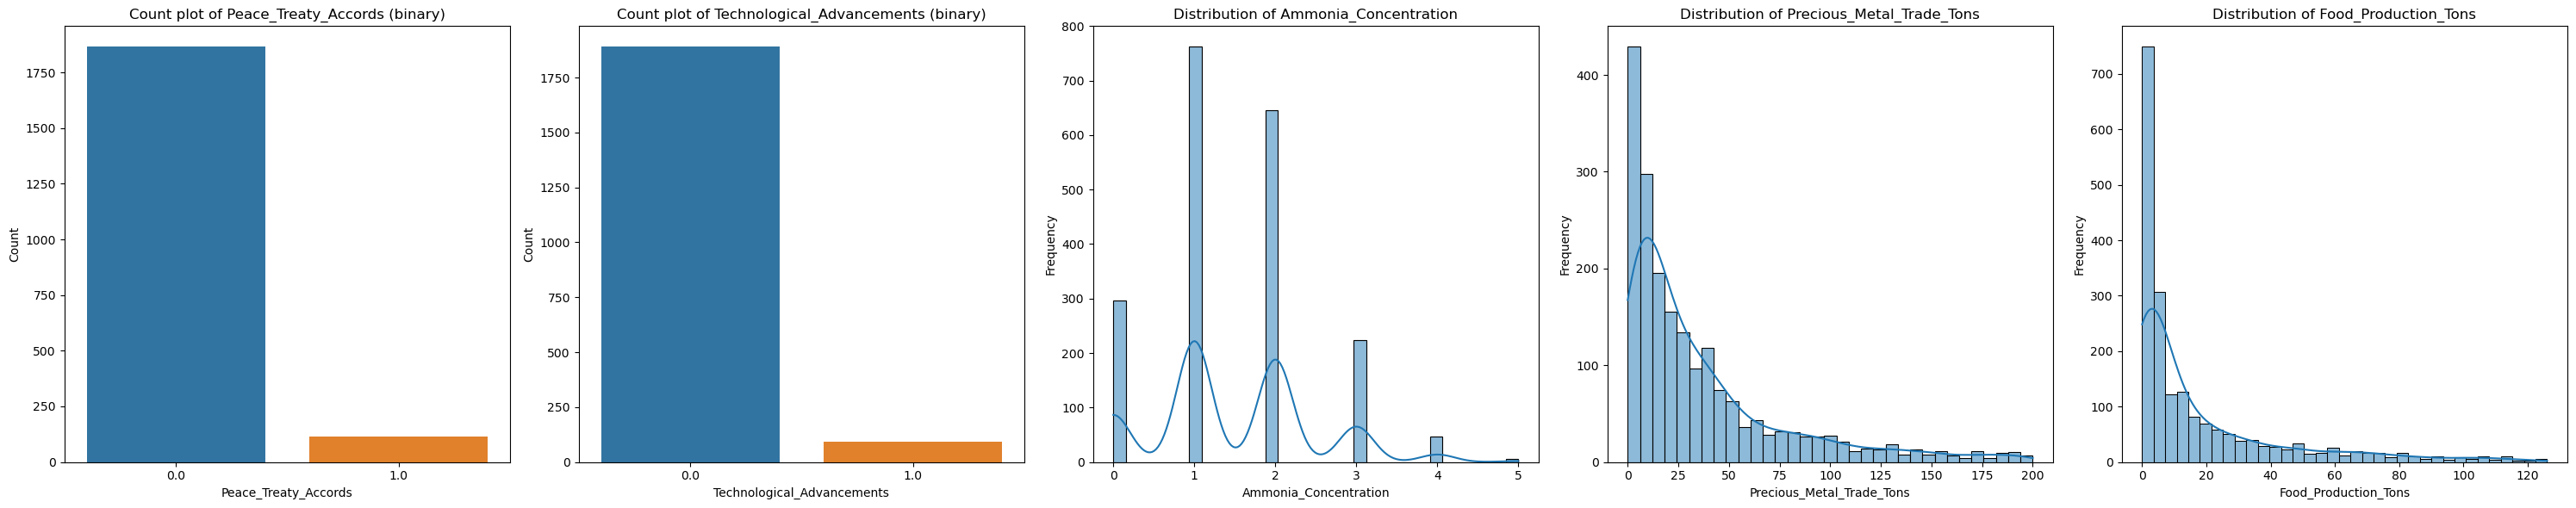

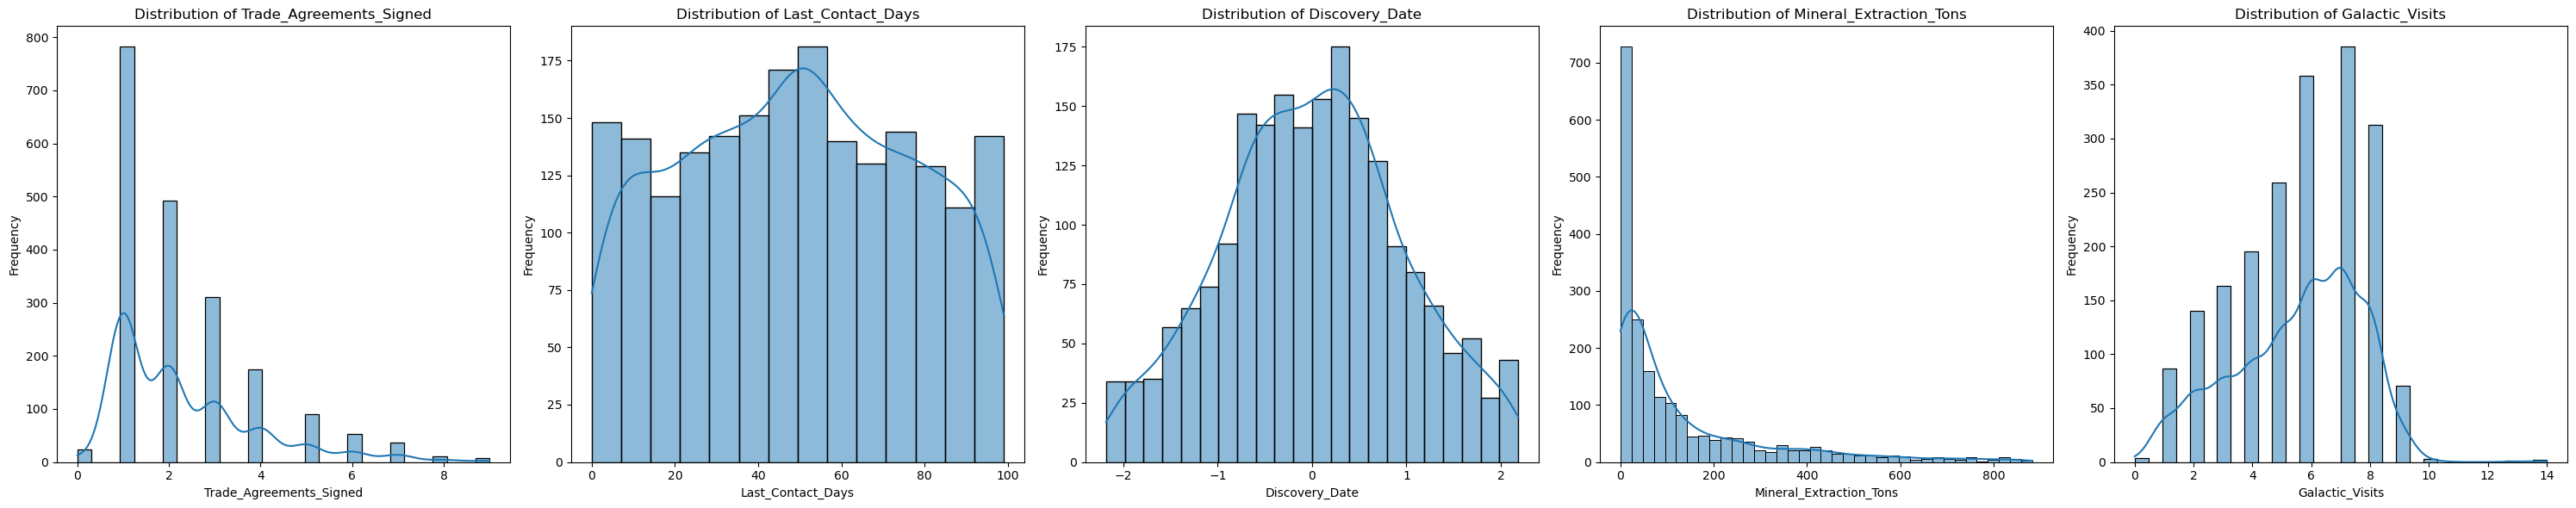

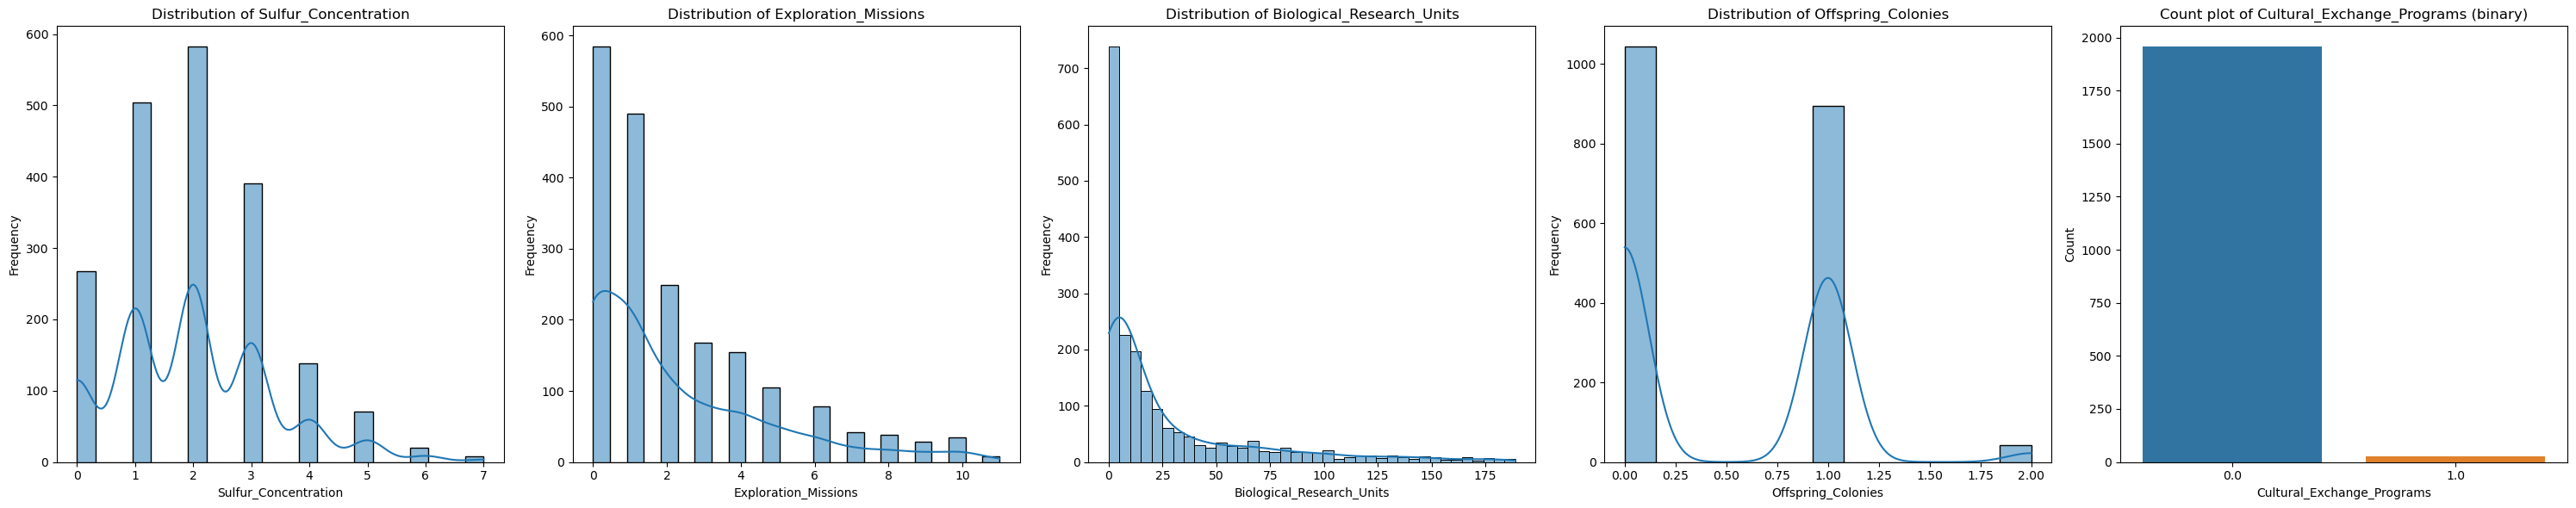

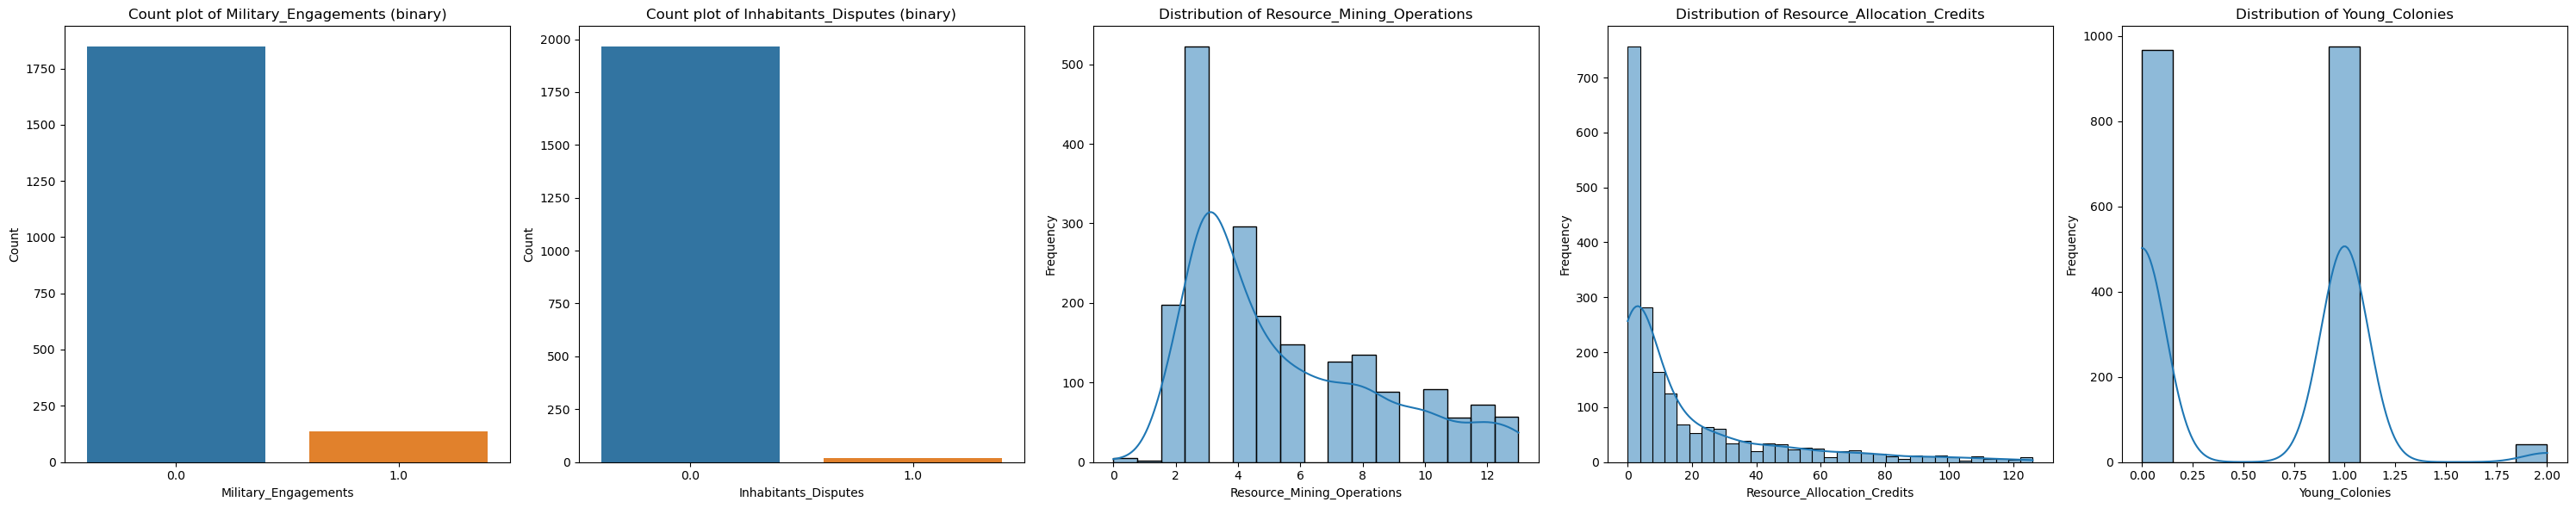

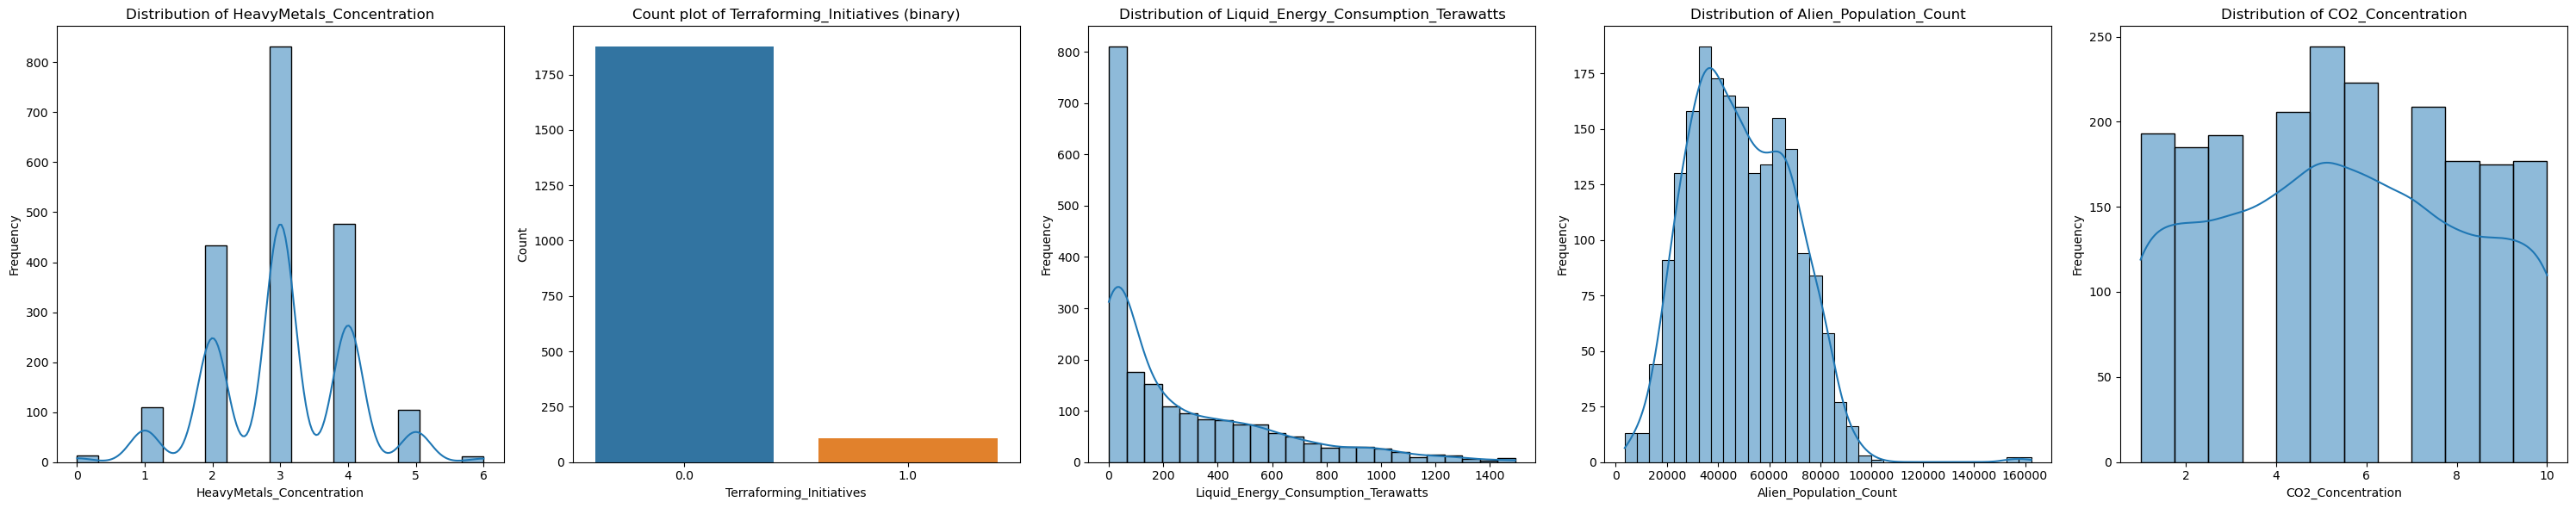

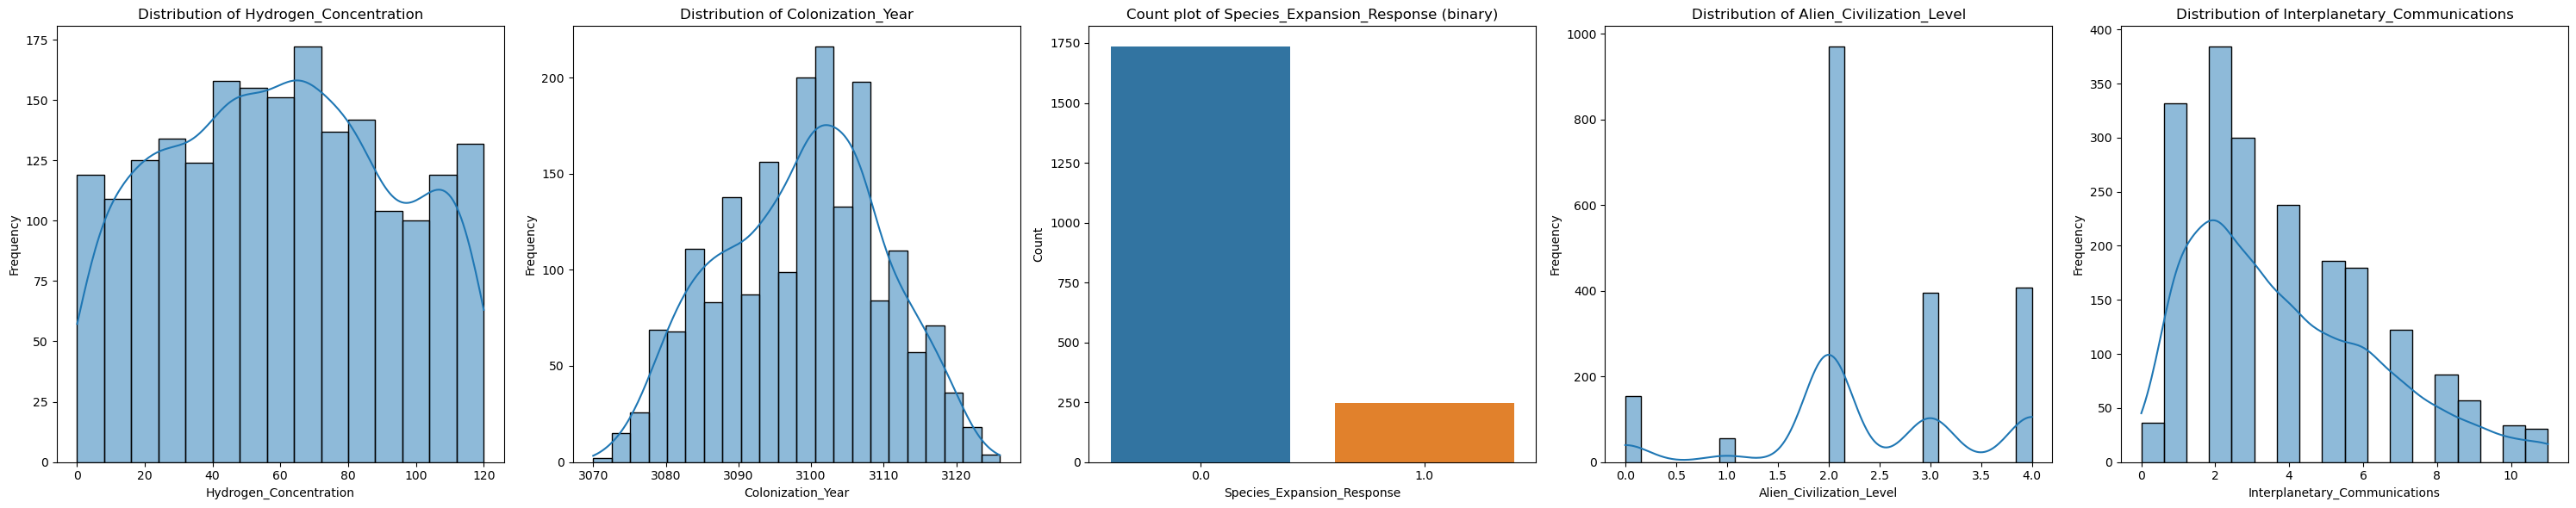

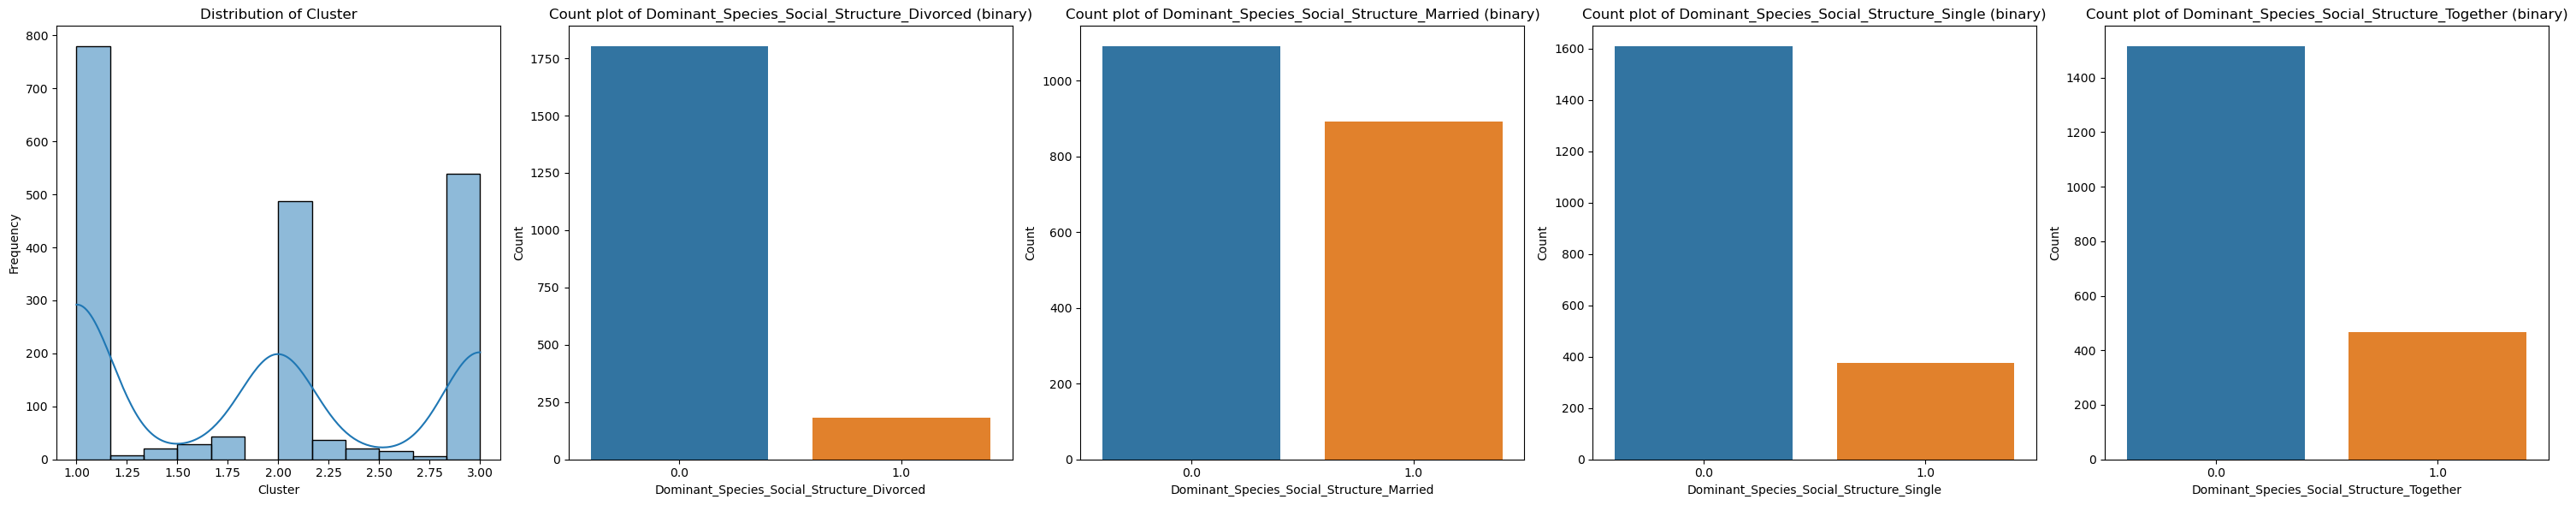

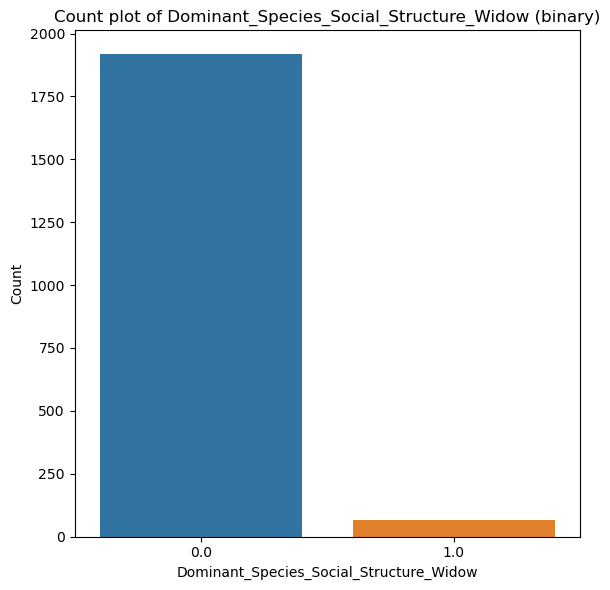

In [120]:
# Plot all variables to get an idea of the different distributions
plots_per_row = 5
columns = df_in_progress_2.columns
perform_graphical_analysis(plots_per_row, columns, df_in_progress_2)

In [118]:
df_in_progress_2 = df_in_progress_2.drop(['Dominant_Species_Social_Structure_YOLO', 'Dominant_Species_Social_Structure_Alone', 'Dominant_Species_Social_Structure_Absurd'], axis=1)

We can now compare whether the correlations are better preserved than when we use the distributions to pad the values.
This is the case. We will continue to use this dataset and eventually compare it.

In [119]:
#Calculate the correlations after completing the values
correlation_df2 = high_correlations(df_in_progress_2)
combined_df = pd.concat([correlation_df, correlation_df2], axis=1)
combined_df.head(10)

,Variable 1,Variable 2,Correlation,Variable 1,Variable 2,Correlation
0,Mineral_Extraction_Tons,Exploration_Missions,0.723468,Mineral_Extraction_Tons,Exploration_Missions,0.724177
1,Resource_Mining_Operations,Liquid_Energy_Consumption_Terawatts,0.639129,Liquid_Energy_Consumption_Terawatts,Alien_Population_Count,0.710793
2,Exploration_Missions,Liquid_Energy_Consumption_Terawatts,0.615159,Exploration_Missions,Liquid_Energy_Consumption_Terawatts,0.707727
3,Food_Production_Tons,Biological_Research_Units,0.599803,Mineral_Extraction_Tons,Alien_Population_Count,0.690276
4,Biological_Research_Units,Resource_Allocation_Credits,0.574609,Exploration_Missions,Alien_Population_Count,0.688125
5,Food_Production_Tons,Resource_Allocation_Credits,0.569224,Resource_Mining_Operations,Liquid_Energy_Consumption_Terawatts,0.667885
6,Mineral_Extraction_Tons,Biological_Research_Units,0.567399,Resource_Mining_Operations,Alien_Population_Count,0.658764
7,Exploration_Missions,Alien_Population_Count,0.564253,Food_Production_Tons,Resource_Allocation_Credits,0.643803
8,Liquid_Energy_Consumption_Terawatts,Interplanetary_Communications,0.562423,Mineral_Extraction_Tons,Liquid_Energy_Consumption_Terawatts,0.641610
9,Liquid_Energy_Consumption_Terawatts,Alien_Population_Count,0.558047,Biological_Research_Units,Resource_Allocation_Credits,0.633154


---
## Hierarchical clustering

This cell standardizes all numerical columns, including one-hot encoded variables, to ensure consistency in scale across the dataset:
1.	Define Columns to Scale:
	* numerical_cols is defined to include all columns in df_in_progress_2, covering both continuous numerical features and one-hot encoded columns. This approach ensures all relevant columns are scaled, preparing the dataset for distance-based methods and algorithms sensitive to feature scales.
2.	Column Transformer Setup:
	* We define a ColumnTransformer named preprocessor_standard with a StandardScaler. This configuration scales only the columns specified in numerical_cols, leaving other types of columns unaffected (though all columns in this case are numerical or one-hot encoded).
3.	Fit and Transform Data:
	* We apply the fit_transform method on df_in_progress_2, which standardizes each specified column by centering it to a mean of zero and scaling it to unit variance.
4.	Convert to DataFrame:
	* The transformed data is converted back into a DataFrame named data_preprocessed_standard_df, retaining the original column names for easier reference and continuity in subsequent analysis.
5.	Preview the Transformed Data:
	* Finally, we display the first few rows of data_preprocessed_standard_df to verify the standardized values and confirm that the scaling process was successful.

In [ ]:
# Define the numerical columns to scale (including already one-hot encoded columns)
numerical_cols = df_in_progress_2.columns

# Define the ColumnTransformer to scale numerical columns only
preprocessor_standard = ColumnTransformer(transformers=[('num', StandardScaler(), numerical_cols)])

# Fit and transform the data
data_preprocessed_standard = preprocessor_standard.fit_transform(df_in_progress_2)

# Convert the transformed data into a DataFrame and assign the column names
data_preprocessed_standard_df = pd.DataFrame(data_preprocessed_standard, columns=numerical_cols)

# Display the first few rows of the preprocessed data
data_preprocessed_standard_df.sample(12)

,Peace_Treaty_Accords,Technological_Advancements,Ammonia_Concentration,Precious_Metal_Trade_Tons,Food_Production_Tons,Trade_Agreements_Signed,Last_Contact_Days,Discovery_Date,Mineral_Extraction_Tons,Galactic_Visits,...,Colonization_Year,Species_Expansion_Response,Alien_Civilization_Level,Interplanetary_Communications,Cluster,Dominant_Species_Social_Structure_Divorced,Dominant_Species_Social_Structure_Married,Dominant_Species_Social_Structure_Single,Dominant_Species_Social_Structure_Together,Dominant_Species_Social_Structure_Widow
1576,-0.249396,-0.219427,-1.520415,-0.518150,-0.388920,-0.823246,-0.284305,-0.469857,-0.726331,1.140963,...,0.391875,-0.377419,-1.317061,-1.125964,1.380420,-0.31614,1.106049,-0.482423,-0.555387,-0.182717
1135,-0.249396,-0.219427,-0.496293,-0.590742,-0.428017,-0.194787,0.147962,-0.645020,-0.680600,0.210820,...,0.030719,2.649574,0.527476,-0.733057,0.154576,-0.31614,-0.904119,-0.482423,1.800547,-0.182717
1514,-0.249396,-0.219427,1.551950,0.183576,0.627608,0.433671,1.732941,0.132533,-0.377632,1.606035,...,1.385054,-0.377419,-0.394793,0.052758,1.380420,-0.31614,1.106049,-0.482423,-0.555387,-0.182717
1289,-0.249396,-0.219427,-0.496293,1.175670,-0.662600,0.433671,-0.500438,-1.418302,-0.366200,0.210820,...,1.655922,2.649574,-0.394793,-0.733057,-1.071267,-0.31614,1.106049,-0.482423,-0.555387,-0.182717
539,-0.249396,-0.219427,-1.520415,-0.614940,-0.506211,-0.823246,-1.184861,0.803280,-0.652018,0.675892,...,1.294765,-0.377419,-0.394793,-0.733057,-1.071267,-0.31614,-0.904119,2.072870,-0.555387,-0.182717
1048,-0.249396,-0.219427,0.527828,-0.881111,-0.701698,-0.823246,-1.725195,1.273230,-0.726331,0.210820,...,0.301586,-0.377419,1.449745,-1.125964,0.154576,-0.31614,-0.904119,-0.482423,1.800547,-0.182717
1848,-0.249396,-0.219427,-0.496293,-0.760124,-0.701698,-0.194787,-0.536461,0.499949,-0.720615,0.675892,...,-0.872171,-0.377419,-0.394793,-0.733057,0.890082,-0.31614,1.106049,-0.482423,-0.555387,-0.182717
1463,-0.249396,-0.219427,0.527828,0.836906,3.677192,-0.823246,-0.464416,0.957082,1.668828,-0.719323,...,-1.955639,-0.377419,1.449745,2.017295,-1.071267,-0.31614,-0.904119,-0.482423,1.800547,-0.182717
430,-0.249396,-0.219427,0.527828,0.812709,1.096775,-0.194787,1.696919,-0.478402,0.914267,-1.184395,...,-1.413905,-0.377419,0.527476,0.838573,-1.071267,-0.31614,1.106049,-0.482423,-0.555387,-0.182717
1220,-0.249396,-0.219427,-0.496293,1.780606,1.996011,-0.823246,-1.761217,-0.200704,2.326211,-2.114538,...,-1.955639,-0.377419,-2.239330,0.445665,1.380420,-0.31614,1.106049,-0.482423,-0.555387,-0.182717


This cell defines a function to evaluate and visualize the performance of hierarchical clustering with different linkage methods using silhouette scores:
1.	Function Definition:
	* The function silhouette_scores_multiple_linkages calculates silhouette scores across a range of cluster numbers for multiple hierarchical linkage methods. Silhouette scores provide an indication of how well-separated the clusters are, with higher scores indicating better-defined clusters.
2.	Setup for Linkage Methods and Subplots:
	* We specify four common linkage methods: single, complete, average, and ward.
	* A 2x2 subplot grid (axs) is created to display the silhouette score trends for each linkage method side by side, with an overall title to describe the purpose of the plot.
3.	Iterate Over Linkage Methods:
	* For each linkage method, we generate a linkage matrix Z using the specified method and calculate silhouette scores for a range of cluster numbers (from 2 up to max_clusters).
	* For each number of clusters, we cut the dendrogram to obtain cluster labels and compute the silhouette score for those clusters, storing the results in sil_scores.
4.	Plot Silhouette Scores:
	* Each subplot displays the silhouette scores as a function of the number of clusters for one of the linkage methods. The scores are plotted with a dashed line and markers, with appropriate titles and labels for each subplot.
5.	Function Application:
	* Finally, we call silhouette_scores_multiple_linkages on the standardized data (data_preprocessed_standard_df) with a maximum of 10 clusters. This generates the silhouette score plots, allowing for a visual comparison of clustering quality across linkage methods.

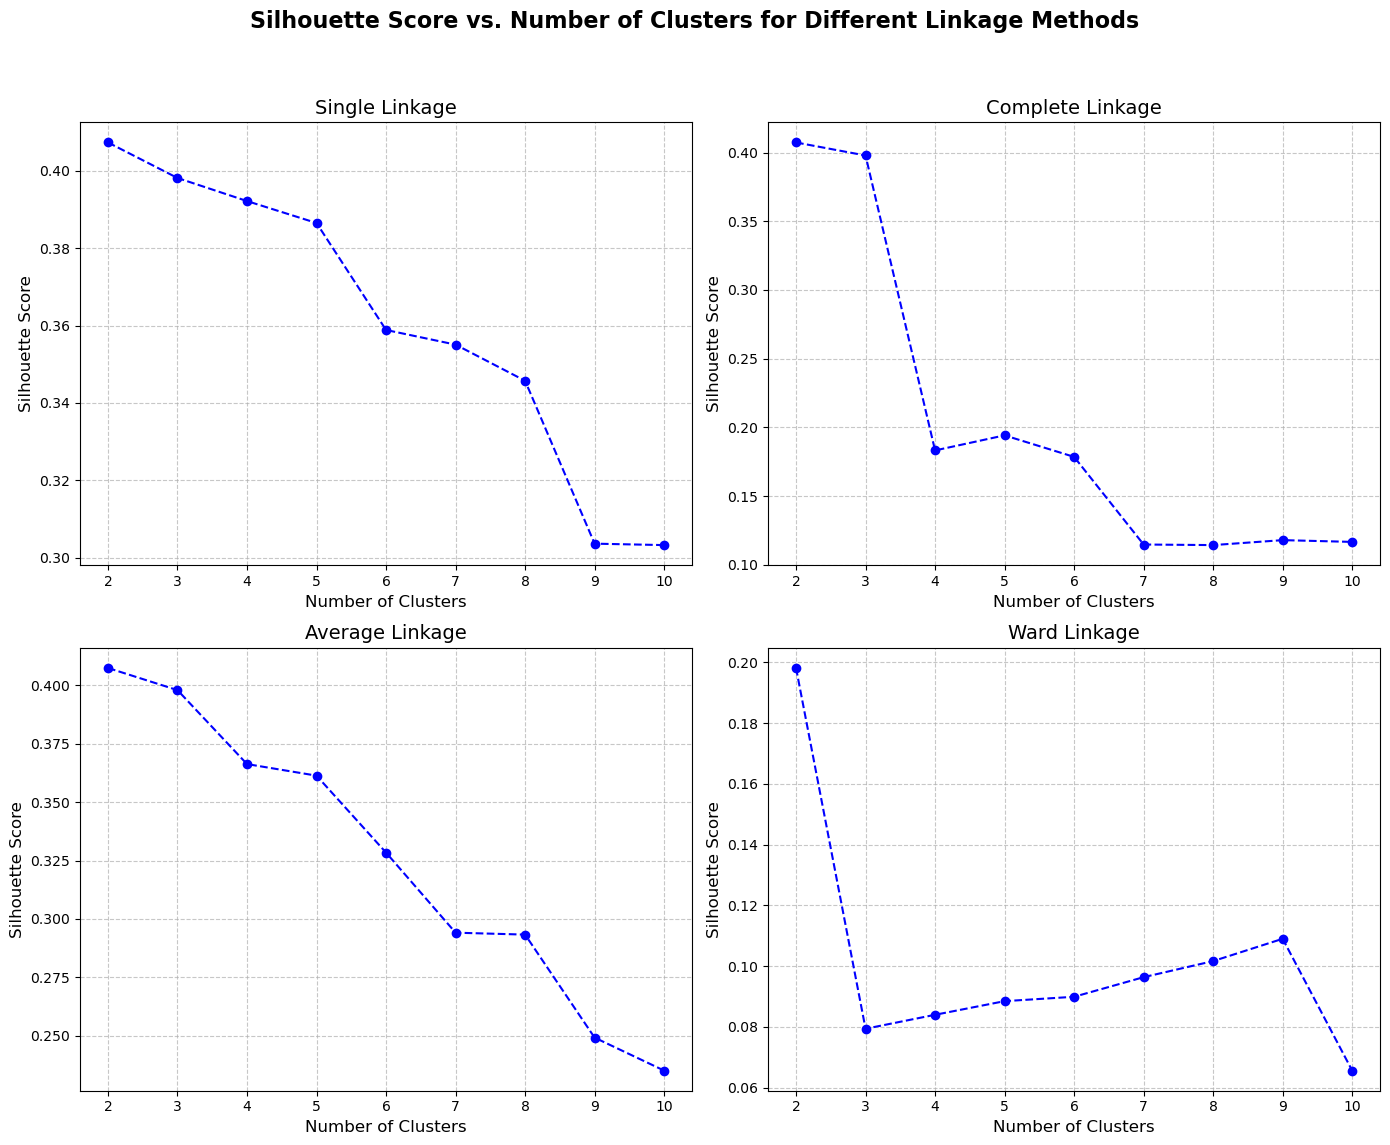

In [122]:
# Define a function to calculate silhouette scores and plot for different linkage methods
def silhouette_scores_multiple_linkages(data, max_clusters=10):
    linkage_methods = ['single', 'complete', 'average', 'ward']
    fig, axs = plt.subplots(2, 2, figsize=(14, 12))
    fig.suptitle('Silhouette Score vs. Number of Clusters for Different Linkage Methods', fontsize=16, fontweight='bold')
    
    # Iterate over each linkage method and calculate silhouette scores
    for i, method in enumerate(linkage_methods):
        # Generate the linkage matrix
        Z = linkage(data, method=method)
        
        sil_scores = []
        cluster_range = range(2, max_clusters + 1)
        
        for n_clusters in cluster_range:
            # Cut the dendrogram at the desired number of clusters
            labels = fcluster(Z, n_clusters, criterion='maxclust')
            sil_score = silhouette_score(data, labels)
            sil_scores.append(sil_score)
        
        # Plot silhouette scores for the current linkage method
        ax = axs[i // 2, i % 2]
        ax.plot(cluster_range, sil_scores, marker='o', linestyle='--', color='b')
        ax.set_title(f'{method.capitalize()} Linkage', fontsize=14)
        ax.set_xlabel('Number of Clusters', fontsize=12)
        ax.set_ylabel('Silhouette Score', fontsize=12)
        ax.grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Apply the function to the preprocessed data
silhouette_scores_multiple_linkages(data_preprocessed_standard_df, max_clusters=10)

Based on the silhouette score analysis across different linkage methods:
* Single, Complete, and Average Linkage methods indicate that the silhouette score is highest when using 2 to 4 clusters, with a noticeable drop as more clusters are added. This suggests that a smaller number of clusters (ideally 2 to 4) provides the best-defined clustering structure for these linkage methods.
* Ward Linkage shows lower silhouette scores overall but demonstrates relatively stable performance, with a slight improvement starting around 3 to 5 clusters. Given Ward’s focus on minimizing within-cluster variance, this range may provide balanced clusters.

Conclusion:

The optimal number of clusters appears to be between 2 and 4 based on the silhouette scores for most linkage methods, particularly for Single, Complete, and Average linkage. If you are aiming for more balanced clusters, consider 3 clusters as a compromise that performs well across all methods, including Ward Linkage.

This cell performs hierarchical clustering on the dataset and examines its correlation with a categorical variable:
1.	Hierarchical Clustering: We apply hierarchical clustering using the ward method on numerical data from df_in_progress_2, then cut the dendrogram to form 4 clusters, which are saved as labels in data_hc4.
2.	Correlation with Categorical Variable: We analyze the relationship between these clusters and Alien_Civilization_Level using a crosstab to show the distribution of civilization levels across the clusters.
3.	Visualization: A bar plot of the crosstab visualizes the association between civilization levels and cluster labels, helping to interpret the cluster composition.

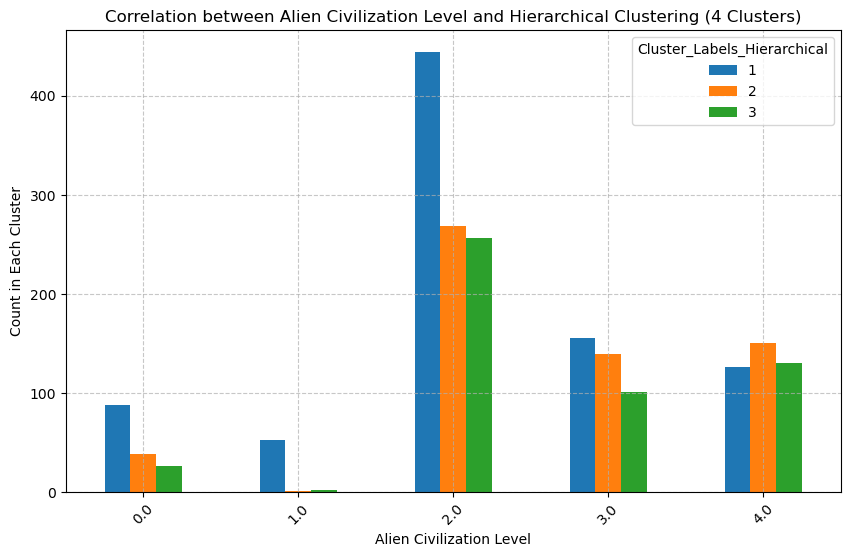

In [123]:
# Assuming df_in_progress_2 is the preprocessed DataFrame with one-hot encoded variables
# Standardize the data (if not already done) for hierarchical clustering, excluding one-hot encoded columns
data_for_clustering = df_in_progress_2.select_dtypes(include=['float64', 'int64'])

# Step 1: Create linkage matrix for hierarchical clustering
Z = linkage(data_for_clustering, method='ward')

# Step 2: Cut the dendrogram to get at most X clusters
n_clusters_hierarchical = 3
cluster_labels_hierarchical = fcluster(Z, n_clusters_hierarchical, criterion='maxclust')

# Step 3: Add the cluster labels to the data
data_hc4 = df_in_progress_2.copy()
data_hc4['Cluster_Labels_Hierarchical'] = cluster_labels_hierarchical

# Step 4: Use a categorical column for correlation analysis (check if 'Alien_Civilization_Level' exists)
categorical_column = 'Alien_Civilization_Level'
if categorical_column in df_in_progress_2.columns:
    data_hc4[categorical_column] = df_in_progress_2[categorical_column]
else:
    # If the specified column does not exist, raise an error or select another available categorical column
    raise KeyError(f"The specified categorical column for analysis ('{categorical_column}') does not exist in df_in_progress_2.")

# Step 5: Create a crosstab to analyze correlation between civilization level and cluster labels
civilization_correlation_hierarchical = pd.crosstab(
    data_hc4[categorical_column],
    data_hc4['Cluster_Labels_Hierarchical']
)

# Step 6: Plot the correlation
civilization_correlation_hierarchical.plot(kind='bar', figsize=(10, 6))
plt.title('Correlation between Alien Civilization Level and Hierarchical Clustering (4 Clusters)')
plt.xlabel('Alien Civilization Level')
plt.ylabel('Count in Each Cluster')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

<Figure size 1000x700 with 0 Axes>

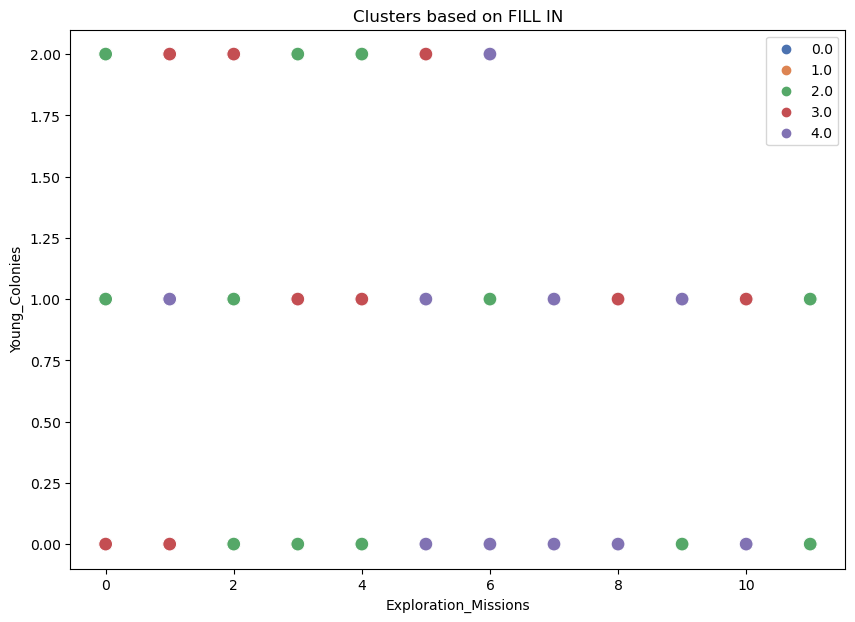

In [124]:
# Assuming you already have the hierarchical linkage matrix 'Z'
# Now, let's cut the dendrogram to create clusters
clusters = fcluster(Z, n_clusters_hierarchical, criterion='maxclust')

data_hc4 = data_preprocessed_standard_df[:]

# Add the cluster labels to the original dataset
data_hc4['Cluster'] = clusters

# Plotting the clusters using Experience Level as the hue
plt.figure(figsize=(10, 7))

# Example scatter plot between two relevant features, say BMI and Calories_Burned
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=df_in_progress_2['Exploration_Missions'], 
    y=df_in_progress_2['Young_Colonies'], 
    hue=df_in_progress_2['Alien_Civilization_Level'], 
    palette="deep", 
    s=100
)
plt.title('Clusters based on FILL IN')
plt.xlabel('Exploration_Missions')
plt.ylabel('Young_Colonies')
plt.legend()
plt.show()

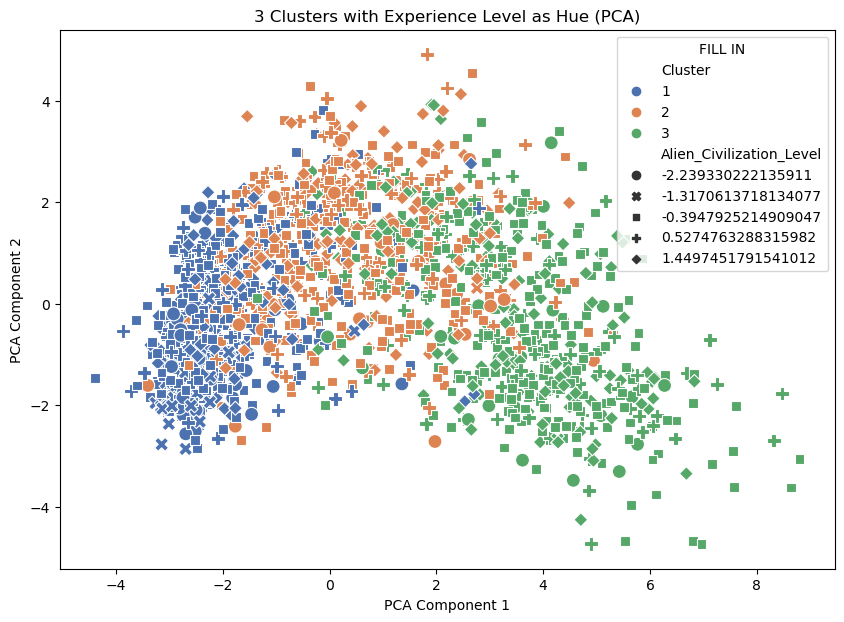

In [129]:
# Assuming you already have the hierarchical linkage matrix 'Z'
# Cut the dendrogram to create clusters (for 3 clusters as an example)
clusters = fcluster(Z, n_clusters_hierarchical, criterion='maxclust')

# Create a copy of the original dataset to work with
data_hc4 = data_preprocessed_standard_df[:]

# Add the cluster labels to the original dataset
data_hc4['Cluster'] = clusters

# Apply PCA to reduce the dimensions to 2 components
pca = PCA(n_components=2)
pca_components = pca.fit_transform(data_preprocessed_standard_df)

# Add PCA components to the dataset for plotting
data_hc4['PCA1'] = pca_components[:, 0]
data_hc4['PCA2'] = pca_components[:, 1]

# Plotting the clusters using Experience Level as the hue
plt.figure(figsize=(10, 7))

# Use PCA components as x and y for the scatter plot
sns.scatterplot(
    x=data_hc4['PCA1'], 
    y=data_hc4['PCA2'], 
    style=data_hc4['Alien_Civilization_Level'], 
    hue=data_hc4['Cluster'],  # Different markers for different clusters
    palette="deep", 
    s=100
)

plt.title('3 Clusters with Experience Level as Hue (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='FILL IN')
plt.show()

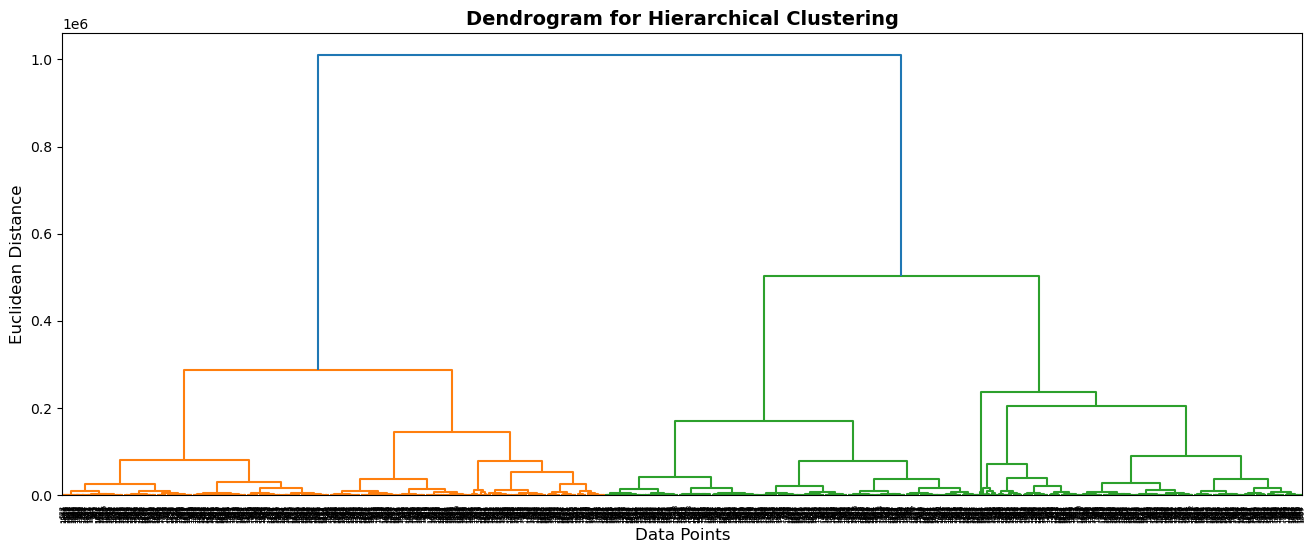

In [126]:
# Plot the dendrogram for the clustering with 4 clusters
plt.figure(figsize=(16, 6))

# Plot the dendrogram
dendrogram(Z)

# Customize the plot aesthetics
plt.title('Dendrogram for Hierarchical Clustering', fontsize=14, weight='bold')
plt.xlabel('Data Points', fontsize=12)
plt.ylabel('Euclidean Distance', fontsize=12)

# Remove grey background and grid for a cleaner look
plt.gca().set_facecolor('white')
plt.grid(False)

# Show the final plot
plt.show()

In [127]:
# Selecting the relevant numerical columns from the original dataset
numerical_columns = [
    'Peace_Treaty_Accords', 'Technological_Advancements', 'Ammonia_Concentration',  'Precious_Metal_Trade_Tons', 'Food_Production_Tons',
    'Trade_Agreements_Signed', 'Last_Contact_Days', 'Mineral_Extraction_Tons',  'Galactic_Visits', 'Sulfur_Concentration',
    'Exploration_Missions', 'Biological_Research_Units', 'Offspring_Colonies', 'Cultural_Exchange_Programs', 'Military_Engagements',
    'Inhabitants_Disputes', 'Resource_Mining_Operations', 'Resource_Allocation_Credits', 'Young_Colonies', 'HeavyMetals_Concentration',
    'Terraforming_Initiatives', 'Liquid_Energy_Consumption_Terawatts', 'Alien_Population_Count', 'CO2_Concentration',
    'Hydrogen_Concentration', 'Colonization_Year', 'Species_Expansion_Response', 'Interplanetary_Communications'
]

# Standardize the data
scaler = StandardScaler()
dps = scaler.fit_transform(df_in_progress_2[numerical_columns])

# Apply PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(dps)

# Extracting the principal components (the direction of maximum variance)
pca_df = pd.DataFrame(pca.components_, columns=numerical_columns, index=['PCA1', 'PCA2'])

# Sorting the features by their absolute values for PCA1 and PCA2 separately
pca1_sorted = pca_df.loc['PCA1'].abs().sort_values(ascending=False)
pca2_sorted = pca_df.loc['PCA2'].abs().sort_values(ascending=False)

# Display the sorted results for PCA1 and PCA2
print("PCA1 Sorted Contributions:")
print(pca1_sorted)

print("\nPCA2 Sorted Contributions:")
print(pca2_sorted)

PCA1 Sorted Contributions:
Exploration_Missions                   0.322232
Alien_Population_Count                 0.319591
Mineral_Extraction_Tons                0.312656
Liquid_Energy_Consumption_Terawatts    0.310153
Resource_Mining_Operations             0.293484
Resource_Allocation_Credits            0.275723
Biological_Research_Units              0.266877
Food_Production_Tons                   0.264037
Offspring_Colonies                     0.246203
Interplanetary_Communications          0.236977
Galactic_Visits                        0.227645
Precious_Metal_Trade_Tons              0.217248
Terraforming_Initiatives               0.168621
Technological_Advancements             0.140314
Military_Engagements                   0.105404
Species_Expansion_Response             0.095194
Colonization_Year                      0.089479
Cultural_Exchange_Programs             0.062095
Trade_Agreements_Signed                0.023442
CO2_Concentration                      0.013374
Peace_Treaty_

In [128]:
# Select only numeric columns for calculating the mean
numeric_data = df_prep.select_dtypes(include=['float64', 'int64'])

df_prep['Cluster'] = data_hc4['Cluster']

# Calculate the mean values of the numeric variables for each cluster
cluster_means_4 = numeric_data.groupby(df_prep['Cluster']).mean()

# Display the mean values to compare the differences between clusters
cluster_means_4.T

Cluster,1.0,2.0,3.0
Peace_Treaty_Accords,0.061198,0.077491,0.062635
Technological_Advancements,0.056122,0.072491,0.084388
Ammonia_Concentration,1.504470,1.446729,1.500000
Precious_Metal_Trade_Tons,44.532650,43.987061,43.579618
Food_Production_Tons,26.577373,26.975143,26.985106
Trade_Agreements_Signed,2.316919,2.301645,2.345652
Last_Contact_Days,50.258929,48.328302,47.498911
Discovery_Date,0.016027,-0.013041,-0.008573
Mineral_Extraction_Tons,174.572864,158.844732,171.997845
Galactic_Visits,5.304293,5.362799,5.284165
